In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("datasets/playground-series-s4e6/train.csv")
test = pd.read_csv("datasets/playground-series-s4e6/test.csv")

train.columns.tolist()

train

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,76514,1,1,6,9254,1,1,125.0,1,1,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,76515,5,17,1,9085,1,1,138.0,1,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,76516,1,1,3,9070,1,1,136.0,1,38,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout


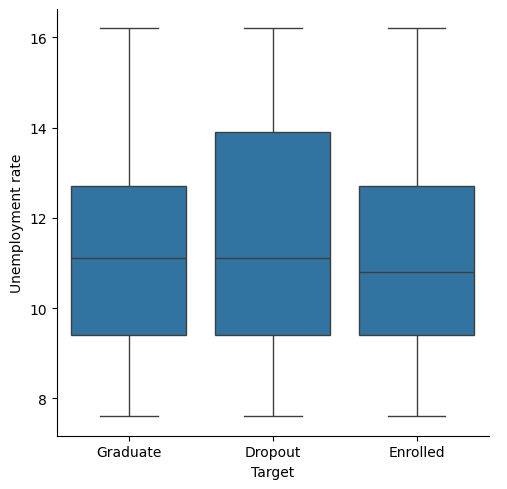

In [6]:
sns.catplot(data=train, x='Target', y='Unemployment rate', kind="box")

<Axes: xlabel='GDP', ylabel='Density'>

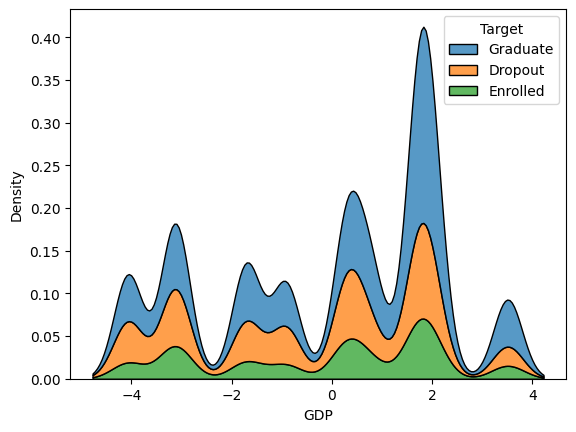

In [10]:
sns.kdeplot(data=train, x='GDP', multiple='stack', hue='Target')

<Axes: xlabel='Previous qualification', ylabel='GDP'>

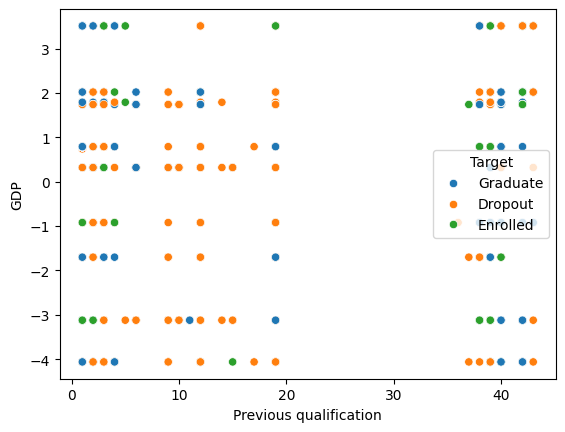

In [18]:
sns.scatterplot(data=train, x='Previous qualification', y='GDP', hue='Target')

In [48]:
from catboost import CatBoostClassifier
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, LabelEncoder
from category_encoders import TargetEncoder
import sklearn

sklearn.set_config(transform_output="pandas")

train.loc[:, train.nunique() < 20]

def categorize_values(df):
    categorical_columns = df.loc[:, train.nunique() < 5].columns.to_list()
    # ohe = OneHotEncoder(categories=categorical_columns)
    # df = ohe.fit_transform(df)
    df[categorical_columns] = df[categorical_columns].astype('category')
    return df

Label Encode The Target Value

In [158]:
le = LabelEncoder()

Y = le.fit_transform(train.Target)

In [154]:
from category_encoders import MEstimateEncoder, CatBoostEncoder

pd.set_option('future.no_silent_downcasting', True)

def build_pipeline1(X, y):
    
    target_columns =  X.loc[:,(X.nunique() < 20)].columns.to_list()
    
    
    print("==")
    print(target_columns)
    columns1 = make_column_transformer(
        (CatBoostEncoder(cols=target_columns,  return_df=True), target_columns),
        remainder='passthrough',
        verbose_feature_names_out=False
    )

    return columns1
    

In [159]:
y = train.Target
X = train.drop("Target", axis=1)

new = build_pipeline1(X, Y)


==
['Marital status', 'Application order', 'Course', 'Daytime/evening attendance', 'Nacionality', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']


In [160]:
new.fit_transform(X,Y)

,Marital status,Application order,Course,Daytime/evening attendance,Nacionality,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,...,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
0,1.143574,1.143574,1.143574,1.143574,1.143574,1.143574,1.143574,1.143574,1.143574,1.143574,...,0,6,6,6,14.500000,0,6,7,6,12.428571
1,1.571787,1.571787,1.571787,1.571787,1.571787,1.143574,1.571787,1.571787,1.571787,1.571787,...,0,6,8,4,11.600000,0,6,9,0,0.000000
2,1.047858,1.143574,1.143574,1.047858,1.047858,1.571787,1.047858,1.047858,1.047858,1.143574,...,0,6,0,0,0.000000,0,6,0,0,0.000000
3,0.785894,1.143574,1.143574,0.785894,0.785894,0.571787,0.785894,0.785894,0.785894,1.047858,...,0,7,9,7,12.591250,0,8,11,7,12.820000
4,0.828715,0.571787,1.071787,0.828715,0.828715,0.714525,0.828715,0.828715,0.828715,1.035894,...,0,7,12,6,12.933333,0,7,12,6,12.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1.180936,1.064697,1.002792,1.177087,1.143577,1.259147,1.143584,1.204542,1.270550,1.342213,...,0,6,9,6,10.666667,0,6,8,5,10.600000
76514,1.180947,1.547583,1.002976,1.177099,1.143588,1.259164,1.143596,1.204554,1.270561,1.342225,...,0,6,22,4,13.000000,0,6,9,6,13.875000
76515,0.802962,1.064714,1.097737,1.177111,1.143600,1.259181,1.143607,1.204565,1.270572,1.342238,...,0,5,13,4,12.500000,0,5,8,5,11.400000
76516,1.180959,1.403084,1.430705,1.177108,1.143598,1.259175,1.143605,1.204562,1.270568,1.342231,...,0,6,0,0,0.000000,0,6,0,0,0.000000


In [157]:
y

0        Graduate
1         Dropout
2         Dropout
3        Enrolled
4        Graduate
           ...   
76513    Graduate
76514    Graduate
76515    Enrolled
76516     Dropout
76517    Graduate
Name: Target, Length: 76518, dtype: object

In [161]:


def est_pipeline(X,y, estimate=None):
    
    pipe = make_pipeline(build_pipeline1(X,y), estimate)
    return pipe
    
    

cat = est_pipeline(X,y, CatBoostClassifier())

cat.fit(X,Y)

==
['Marital status', 'Application order', 'Course', 'Daytime/evening attendance', 'Nacionality', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']
Learning rate set to 0.098718
0:	learn: 0.9944913	total: 92.9ms	remaining: 1m 32s
1:	learn: 0.9149630	total: 114ms	remaining: 57s
2:	learn: 0.8512496	total: 133ms	remaining: 44.1s
3:	learn: 0.8010131	total: 150ms	remaining: 37.4s
4:	learn: 0.7583358	total: 168ms	remaining: 33.5s
5:	learn: 0.7210833	total: 186ms	remaining: 30.8s
6:	learn: 0.6898524	total: 201ms	remaining: 28.5s
7:	learn: 0.6631642	total: 218ms	remaining: 27s
8:	learn: 0.6401153	total: 232ms	remaining: 25.5s
9:	learn: 0.6197289	total: 245ms	remaining: 24.3s
10:	learn: 0.6029082	total: 264ms	remaining: 23.7s
11:	learn: 0.5881373	total: 277ms	remaining: 22.8

/Users/alexander.norton/Documents/Machine-Learning/.conda/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('catboostencoder',
                                                  CatBoostEncoder(cols=['Marital '
                                                                        'status',
                                                                        'Application '
                                                                        'order',
                                                                        'Course',
                                                                        'Daytime/evening '
                                                                        'attendance',
                                                                        'Nacionality',
                                                                        'Displaced',
                                                                        'Educational '
                                                                        'special '
                                                                        'needs',
                                                                        'Debtor',
                                                                        'Tuition '
                                                                        'fees '
                                                                        'up to '
                                                                        'date',
                                                                        'Gender',
                                                                        'Scholarship '
                                                                        'holder',
                                                                        'International...
                                                   'Educational special needs',
                                                   'Debtor',
                                                   'Tuition fees up to date',
                                                   'Gender',
                                                   'Scholarship holder',
                                                   'International',
                                                   'Curricular units 1st sem '
                                                   '(without evaluations)',
                                                   'Curricular units 2nd sem '
                                                   '(without evaluations)',
                                                   'Unemployment rate',
                                                   'Inflation rate', 'GDP'])],
                                   verbose_feature_names_out=False)),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x31247e990>)])

Learning rate set to 0.097601
0:	learn: 0.9956347	total: 14.3ms	remaining: 14.3s
1:	learn: 0.9162212	total: 26.3ms	remaining: 13.1s
2:	learn: 0.8535681	total: 40.3ms	remaining: 13.4s
3:	learn: 0.8032949	total: 51.8ms	remaining: 12.9s
4:	learn: 0.7611110	total: 63.7ms	remaining: 12.7s
5:	learn: 0.7250770	total: 76.2ms	remaining: 12.6s
6:	learn: 0.6936133	total: 87ms	remaining: 12.3s
7:	learn: 0.6669551	total: 97.9ms	remaining: 12.1s
8:	learn: 0.6444469	total: 108ms	remaining: 11.9s
9:	learn: 0.6255452	total: 119ms	remaining: 11.7s
10:	learn: 0.6080534	total: 130ms	remaining: 11.7s
11:	learn: 0.5930276	total: 140ms	remaining: 11.5s
12:	learn: 0.5794199	total: 151ms	remaining: 11.5s
13:	learn: 0.5674847	total: 162ms	remaining: 11.4s
14:	learn: 0.5578970	total: 174ms	remaining: 11.4s
15:	learn: 0.5486052	total: 185ms	remaining: 11.4s
16:	learn: 0.5405440	total: 198ms	remaining: 11.5s
17:	learn: 0.5329850	total: 211ms	remaining: 11.5s
18:	learn: 0.5267795	total: 227ms	remaining: 11.7s
19:	l

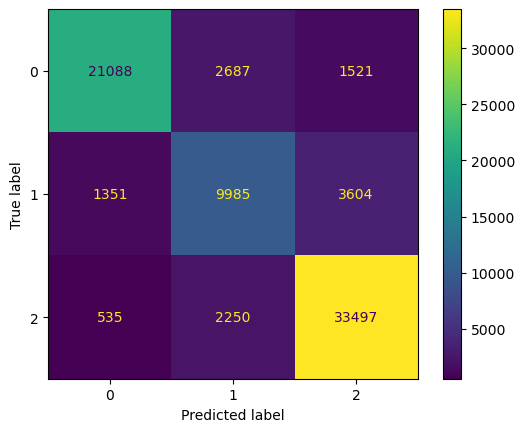

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

def tester(X,y,pipeline):
    
    X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
    
    pipeline.fit(X_train, y_train)
    
    ConfusionMatrixDisplay.from_estimator(pipeline,X=X,y=y)
    print(f'The accucary is {accuracy_score(pipeline.predict(x_test), y_test):.2}')
    
    
    plt.show()
    return pipeline
    
    
trained = tester(X,Y, cat)

# Submission

In [167]:


submission = pd.DataFrame()
submission['id'] = test.id

y_pred = trained.predict(test)
submission['Target'] = le.inverse_transform(y_pred)

submission.to_csv('submissions/student_enroll.csv', header=True, index=False)

/Users/alexander.norton/Documents/Machine-Learning/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
